# Lab 1 - Python fundamentals
## DNA decoding
### Task 1 & Task 2
Count the number of different DNA letters in each sequence.

Counts for sequence 1:
A: 17, T: 7, C: 8, G: 2



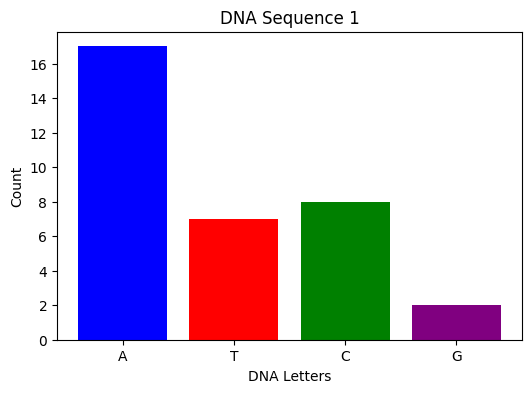

Counts for sequence 2:
A: 3, T: 7, C: 4, G: 10



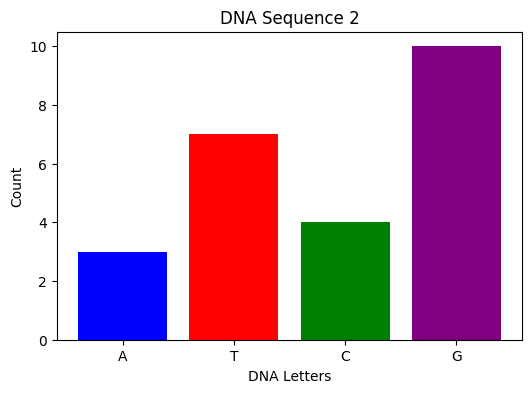

Counts for sequence 3:
A: 36, T: 19, C: 34, G: 21



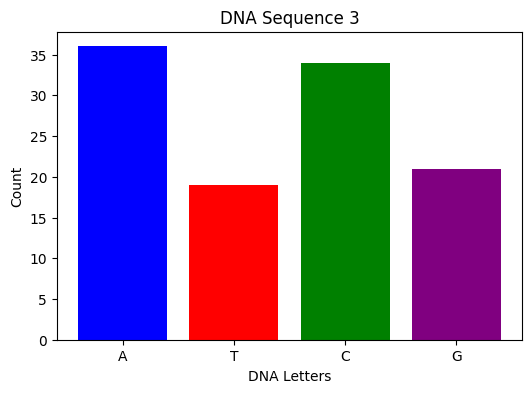

Counts for sequence 4:
A: 17, T: 12, C: 15, G: 20



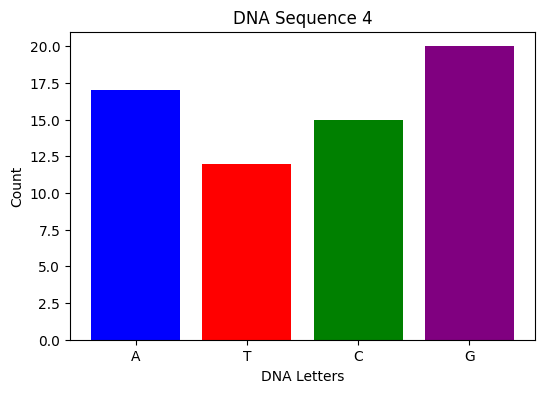

In [12]:
# ----------------------------------------------------------------------------------
# MODULES
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
# ----------------------------------------------------------------------------------
# FUNCTIONS
# Open file with DNA sequence, extract data, store it in a list, and close it
def open_and_extract_data_from_file():
    sequences = []  # List to store sequence dictionaries
    current_seq = None  # Temporary dictionary to store a sequence

    with open('data/dna_raw_complicated.txt', 'r') as dna_file:
        for line in dna_file:
            line = line.strip().upper()  # Remove whitespaces and uppercase all letters

            if line.startswith('>'):  # If it's a header (beginning of sequence)
                if current_seq is not None: # ('is not None' can be skipped)
                    sequences.append(current_seq)  # Save previous sequence

                # Create a new sequence dictionary
                current_seq = {"id": line[4:], "sequence": ""}
            else:
                if current_seq is not None:
                    current_seq["sequence"] += line  # Append sequence data

        if current_seq is not None:
            sequences.append(current_seq)  # Add last sequence

    return sequences  # Return the list of sequences
# ----------------------------------------------------------------------------------
# Count each letter in each dictionary's 'sequence'-key and store it 
def count_letters_in_sequence(sequence_string):
    letter_count = Counter(sequence_string)

    # Filter and ensure order
    ordered_letters = ['A', 'T', 'C', 'G']
    filtered_count = {key: letter_count[key] for key in ordered_letters if key in letter_count}

    print(", ".join(f"{key}: {filtered_count[key]}" for key in ordered_letters if key in filtered_count))

    return filtered_count

# ----------------------------------------------------------------------------------
# Print the result
def print_letters_per_seq(sequences):
    for seq in sequences:
        print(f"Counts for sequence {seq['id']}:")
        letter_counts = count_letters_in_sequence(seq["sequence"])
        print()

        # Generate a graph
        graph_letter_frequencies(seq["id"], letter_counts)
# ----------------------------------------------------------------------------------
# Graph-plotting
def graph_letter_frequencies(seq_id, letter_counts):
    plt.figure(figsize=(6, 4)) 

    letters = list(letter_counts.keys()) # Extract the DNA letters (A, T, C, G)
    counts = list(letter_counts.values()) # Extract corresponding counts

    plt.bar(letters, counts, color=['blue', 'red', 'green', 'purple'])
    plt.xlabel("DNA Letters")
    plt.ylabel("Count")
    plt.title(f"DNA Sequence {seq_id}")
    plt.show()

# ----------------------------------------------------------------------------------
# MAIN PROGRAM
# Adds elements (dictionaries) to a list with the help of a function
sequences = open_and_extract_data_from_file()

print_letters_per_seq(sequences)



